# SVM Approch

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)
from sklearn.pipeline import Pipeline


#Grid Search
from sklearn.model_selection import GridSearchCV

#Model(s)
from sklearn.svm import SVC


## Work flow
0. [ ] Clean and Engeering Data for X and y
1. [ ] Split Data in Train/Test for X and y
2. [ ] Scaler on Training X & X test
3. [ ] Create Model(s)
4. [ ] Create Pipeline and HyperParameters
5. [ ] Fit/Train Model(s) on X Train
6. [ ] Evaluate Model(s) on X test
7. [ ] Adjust Param as Necessary
8. [ ] Bonus: Save Model(s)

In [2]:
#filename = #import model approch for  joblib

### PreProcess


#### Clean and Engeering Data

In [3]:
X_train = pd.read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Training_Data')
X_test = pd .read_excel('../Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Test_Data')


#### Clean and Engeering Data

X_test=X_test.drop(['Attribute Information:'],axis=1)

y_train = X_train[' UNS']
X_train = X_train.drop([' UNS'], axis=1)


y_test = X_test[' UNS']
X_test =X_test.drop([' UNS','Unnamed: 6','Unnamed: 7'],axis=1)

X_train.info()

X_train

#OK

X_test.info()


#OK

y_test.value_counts()

y_train.value_counts()

y_train.value_counts()

#need to map
vTs={
    'Very Low':0,
    'very_low':0,
    'Low':1,
    'Middle':2,
    'High':3
}
y_train = y_train.map(vTs)

y_test.value_counts()

#need map
y_test = y_test.map(vTs)

#df['Output']= df['Output'].map({'N':1,'O':0})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
dtypes: float64(5)
memory usage: 10.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     145 non-null    float64
 1   SCG     145 non-null    float64
 2   STR     145 non-null    float64
 3   LPR     145 non-null    float64
 4   PEG     145 non-null    float64
dtypes: float64(5)
memory usage: 5.8 KB


### Model

In [4]:
svc = SVC()

In [5]:
pipe = Pipeline([('svc',svc)])

In [6]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [28]:
#hyper param value
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = list(range(1,16))
gamma = ['scale','auto']
decision_function_shape = ['ovo','ovr']

In [29]:
hyp_param ={
    'svc__kernel':kernel,
    'svc__decision_function_shape':decision_function_shape,
    'svc__gamma':gamma,
    'svc__degree':degree,
}

#### Create Model(s)

In [30]:
full_model = GridSearchCV(estimator=pipe, param_grid=hyp_param,cv=5, verbose=2)

#### Train Model

In [31]:
full_model.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__decision_function_shape=ovo, svc__degree=1, svc__gamma=scale, svc__kernel=poly; total time=   0.0s
[CV] END svc__decision

GridSearchCV(cv=5, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

### Evaluate model

In [32]:
y_pred = full_model.predict(X_test)

#### Test On data

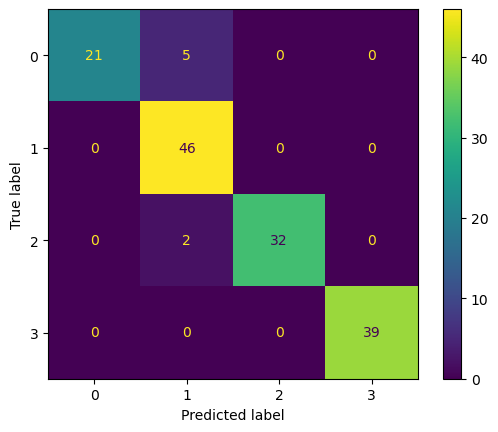

In [33]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(
    y_true=y_test, y_pred=y_pred)
                       ,display_labels=full_model.classes_).plot()

In [34]:
print(classification_report(y_pred=y_pred,
                      y_true=y_test))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        26
           1       0.87      1.00      0.93        46
           2       1.00      0.94      0.97        34
           3       1.00      1.00      1.00        39

    accuracy                           0.95       145
   macro avg       0.97      0.94      0.95       145
weighted avg       0.96      0.95      0.95       145



In [26]:
full_model.best_params_

{'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__gamma': 'scale',
 'svc__kernel': 'poly'}

### Final Model(s)


#### Train on all Data 

In [36]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])

In [37]:
final_model = SVC(decision_function_shape='ovo',degree=2,gamma='scale',kernel='poly')
final_model.fit(X,y)

SVC(decision_function_shape='ovo', degree=2, kernel='poly')

#### Save with joblib

In [38]:
import joblib
joblib.dump(value=final_model,filename='SVC.pkl')

['SVC.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
